## Pair Programming
### Decision Trees

In [63]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
from graphviz import Source
from sklearn import tree


In [29]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'])

In [94]:
flower = DecisionTreeClassifier(max_depth= 10)
flower.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10)

## Manually predict data by row or rows


In [95]:
## predicting lables of unseen data

#single
flower.predict(X_test.iloc[0].values.reshape(1,-1))

#multiple
flower.predict(X_test[0:10])

array([1, 0, 2, 2, 1, 2, 0, 1, 1, 0])

## Score

In [96]:
score = flower.score(X_test, Y_test)
print(score)

0.9210526315789473


In [99]:
## Max Depth

max_depth_range = list(range(1,11))
accuracy=[]
depth_list= []

for depth in max_depth_range:
    depth_list.append(depth)
    
    flower = DecisionTreeClassifier(max_depth= depth)
    flower.fit(X_train, Y_train)

    score = flower.score(X_test, Y_test)
    accuracy.append(score)

## Determing visually the best depth

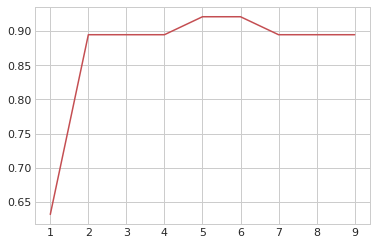

In [101]:
plt.style.use('seaborn-whitegrid')
fig = plt.plot(depth_list,accuracy, color='r')


## Parameter affects 

[0.         0.01429027 0.43632544 0.54938429]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


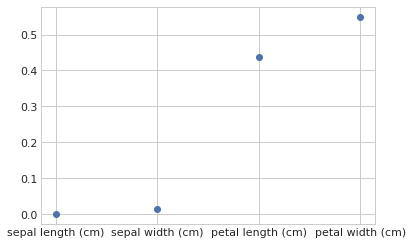

In [81]:
pa = flower.feature_importances_
print(pa)
print(data.feature_names)
plt.style.use('seaborn-whitegrid')
plt.scatter(data.feature_names, pa)

## Graphing the Decision Tree

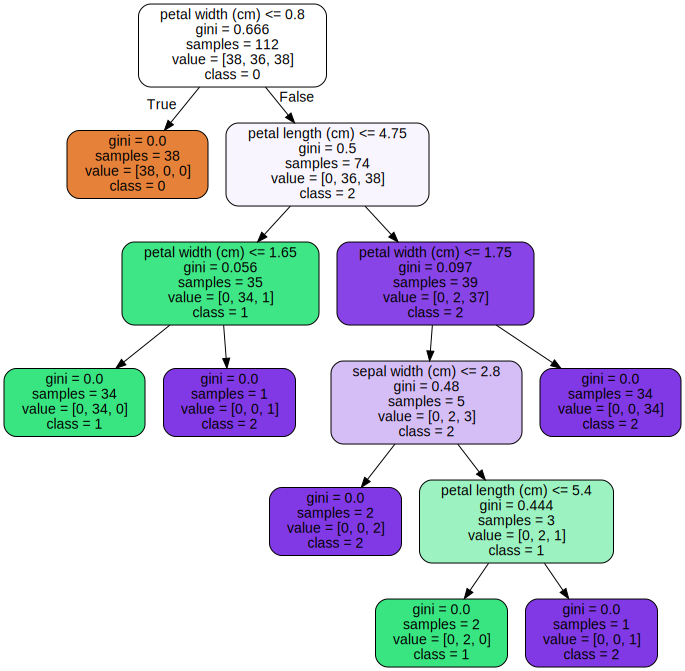

In [59]:
graph = Source(tree.export_graphviz(flower, out_file=None, feature_names=data.feature_names, class_names=['0','1','2'],filled=True, rounded=True ))
graph

In [103]:
print(flower.get_depth())

5
